# Bank_marketing

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Dropping duration

In [7]:
# The reson for dropping duration is that if duarion = 0 => y = 'no'. It affects too the outcome too much
# It also does not create any business value

In [8]:
df.drop("duration", axis = 1, inplace = True)

In [9]:
df["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

## Checking number of unique values in the object columns

In [10]:
objects = df.select_dtypes("object").columns

In [11]:
objects

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [12]:
len(objects)

11

In [13]:
cat_uni_vals = {col: df[col].unique() for col in objects}

In [14]:
cat_uni_vals

{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes', 'unknown'], dtype=object),
 'loan': array(['no', 'yes', 'unknown'], dtype=object),
 'contact': array(['telephone', 'cellular'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 'day_of_week': array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 'poutcome': array(['nonexistent', 'failure', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

## Cleaning cathegorical columns

In [15]:
# Unknown and illiterate are removed. Illiterate because of very few occurences, creating problem with dummy vars

In [16]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [17]:
df = df[df['job'] != 'unknown']

In [18]:
df['marital'].value_counts()

marital
married     24694
single      11494
divorced     4599
unknown        71
Name: count, dtype: int64

In [19]:
df = df[df['marital'] != 'unknown']

In [20]:
df['education'].value_counts()

education
university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
unknown                 1596
illiterate                18
Name: count, dtype: int64

In [21]:
df = df[df['education'] != 'unknown']

In [22]:
df = df[df['education'] != 'illiterate']

In [23]:
df['default'].value_counts()

default
no         31213
unknown     7957
yes            3
Name: count, dtype: int64

In [24]:
df = df[df['default'] != 'unknown']

In [25]:
df['housing'].value_counts()

housing
yes        16515
no         13962
unknown      739
Name: count, dtype: int64

In [26]:
df = df[df['housing'] != 'unknown']

In [27]:
df['loan'].value_counts()

loan
no     25709
yes     4768
Name: count, dtype: int64

In [28]:
df = df[df['loan'] != 'unknown']

In [29]:
df.contact.value_counts()

contact
cellular     20433
telephone    10044
Name: count, dtype: int64

In [30]:
df.month.value_counts()

month
may    9733
jul    5079
aug    4669
jun    3614
nov    3493
apr    2113
oct     642
sep     495
mar     482
dec     157
Name: count, dtype: int64

In [31]:
df.day_of_week.value_counts()

day_of_week
thu    6390
mon    6279
wed    6123
tue    5953
fri    5732
Name: count, dtype: int64

In [32]:
df.poutcome.value_counts()

poutcome
nonexistent    25826
failure         3460
success         1191
Name: count, dtype: int64

## Outliers

In [33]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30477.000000,30477.000000,30477.000000,30477.00000,30477.000000,30477.000000,30477.000000,30477.000000,30477.000000
mean,39.028120,2.521639,956.316895,0.19431,-0.071401,93.523439,-40.602461,3.459987,5160.810736
std,10.333885,2.720551,201.407999,0.52285,1.610378,0.585353,4.789055,1.777253,75.162085
min,17.000000,1.000000,0.000000,0.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,1.000000,999.000000,0.00000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,2.000000,999.000000,0.00000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,3.000000,999.000000,0.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,43.000000,999.000000,7.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
# pdays = 999 means that the customer has never been called before, might divide the df into two separate ones
# Or group it by pdays = 999 or other pdays

## Creating a new variable, prior contact

In [34]:
df['prior_contact'] = 0

In [36]:
df.loc[df['pdays'] == 999, 'prior_contact'] = 1

In [37]:
df.prior_contact.value_counts()

prior_contact
1    29167
0     1310
Name: count, dtype: int64

# Dropping pdays

In [48]:
df.drop(columns = 'pdays', inplace = True)

In [49]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'prior_contact'],
      dtype='object')

# EDA

# T-test to check if pdays have a significant impact

In [38]:
df_no_pc = df.loc[df['prior_contact'] == 0]

In [39]:
from scipy.stats import ttest_ind

# Assuming you have a DataFrame 'df_prior_contact' with columns 'y' and 'pdays'

# Extract 'pdays' values for 'y' = yes
group_yes = df_no_pc[df_no_pc['y'] == 'yes']['pdays']

# Extract 'pdays' values for 'y' = no
group_no = df_no_pc[df_no_pc['y'] == 'no']['pdays']

# Perform independent t-test
t_statistic, p_value = ttest_ind(group_yes, group_no)

# Check the p-value to determine significance
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject null hypothesis, there is a significant difference in mean 'pdays' between 'y' = yes and 'y' = no.")
else:
    print("Fail to reject null hypothesis, there is no significant difference in mean 'pdays' between 'y' = yes and 'y' = no.")


Fail to reject null hypothesis, there is no significant difference in mean 'pdays' between 'y' = yes and 'y' = no.


In [41]:
p_value

0.3633513299929909

In [40]:
# Therefore not including pdays as a feature

# Investigating the dataset

In [43]:
df.y.value_counts()

y
no     26621
yes     3856
Name: count, dtype: int64

In [46]:
df.select_dtypes("number").columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'prior_contact'],
      dtype='object')

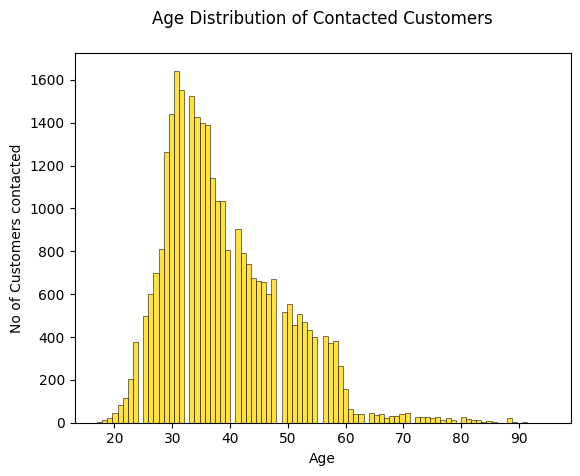

In [44]:
import matplotlib.pyplot as plt

sns.histplot(df['age'], color = 'gold')

plt.title("Age Distribution of Contacted Customers\n")
plt.xlabel("Age")
plt.ylabel("No of Customers contacted")

plt.savefig("age_distribution.png", transparent = True)
plt.show()

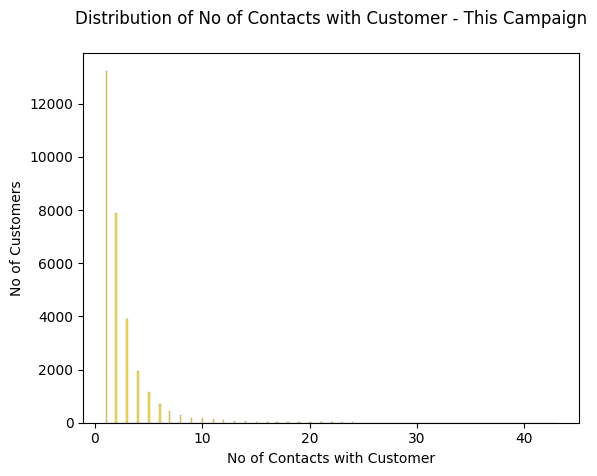

In [50]:
sns.histplot(df['campaign'], color = 'gold')

plt.title("Distribution of No of Contacts with Customer - This Campaign\n")
plt.xlabel("No of Contacts with Customer")
plt.ylabel("No of Customers")

plt.savefig("campaign_distribution.png", transparent = True)
plt.show()

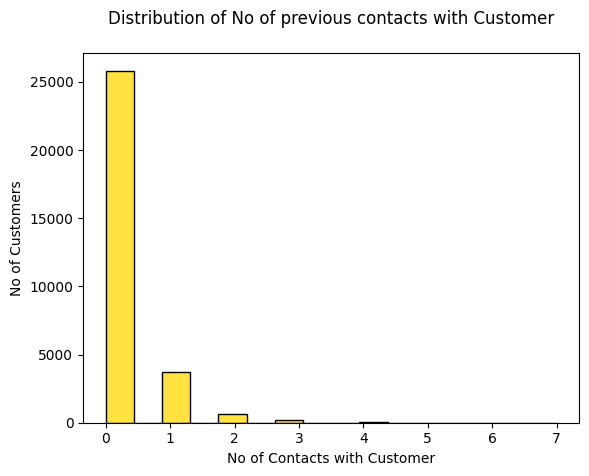

In [55]:
sns.histplot(df['previous'], color = 'gold')

plt.title("Distribution of No of previous contacts with Customer\n")
plt.xlabel("No of Contacts with Customer")
plt.ylabel("No of Customers")

plt.savefig("previous_contacts.png", transparent = True)
plt.show()

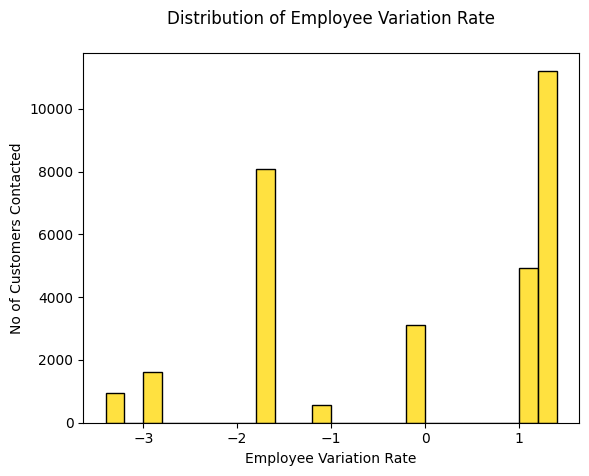

In [56]:
sns.histplot(df['emp.var.rate'], color = 'gold')

plt.title("Distribution of Employee Variation Rate\n")
plt.xlabel("Employee Variation Rate")
plt.ylabel("No of Customers Contacted")

plt.savefig("emp_distr.png", transparent = True)
plt.show()

In [54]:
df.select_dtypes('number').columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'prior_contact'],
      dtype='object')

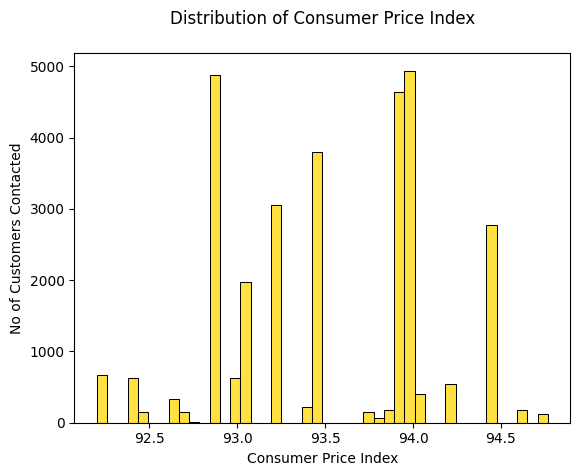

In [57]:
sns.histplot(df['cons.price.idx'], color = 'gold')

plt.title("Distribution of Consumer Price Index\n")
plt.xlabel("Consumer Price Index")
plt.ylabel("No of Customers Contacted")

plt.savefig("cons_price.png", transparent = True)
plt.show()

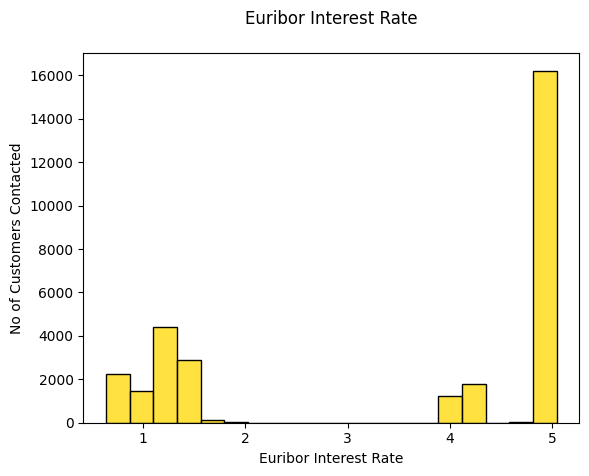

In [58]:
sns.histplot(df['euribor3m'], color = 'gold')

plt.title("Euribor Interest Rate\n")
plt.xlabel("Euribor Interest Rate")
plt.ylabel("No of Customers Contacted")

plt.savefig("euribor.png", transparent = True)
plt.show()

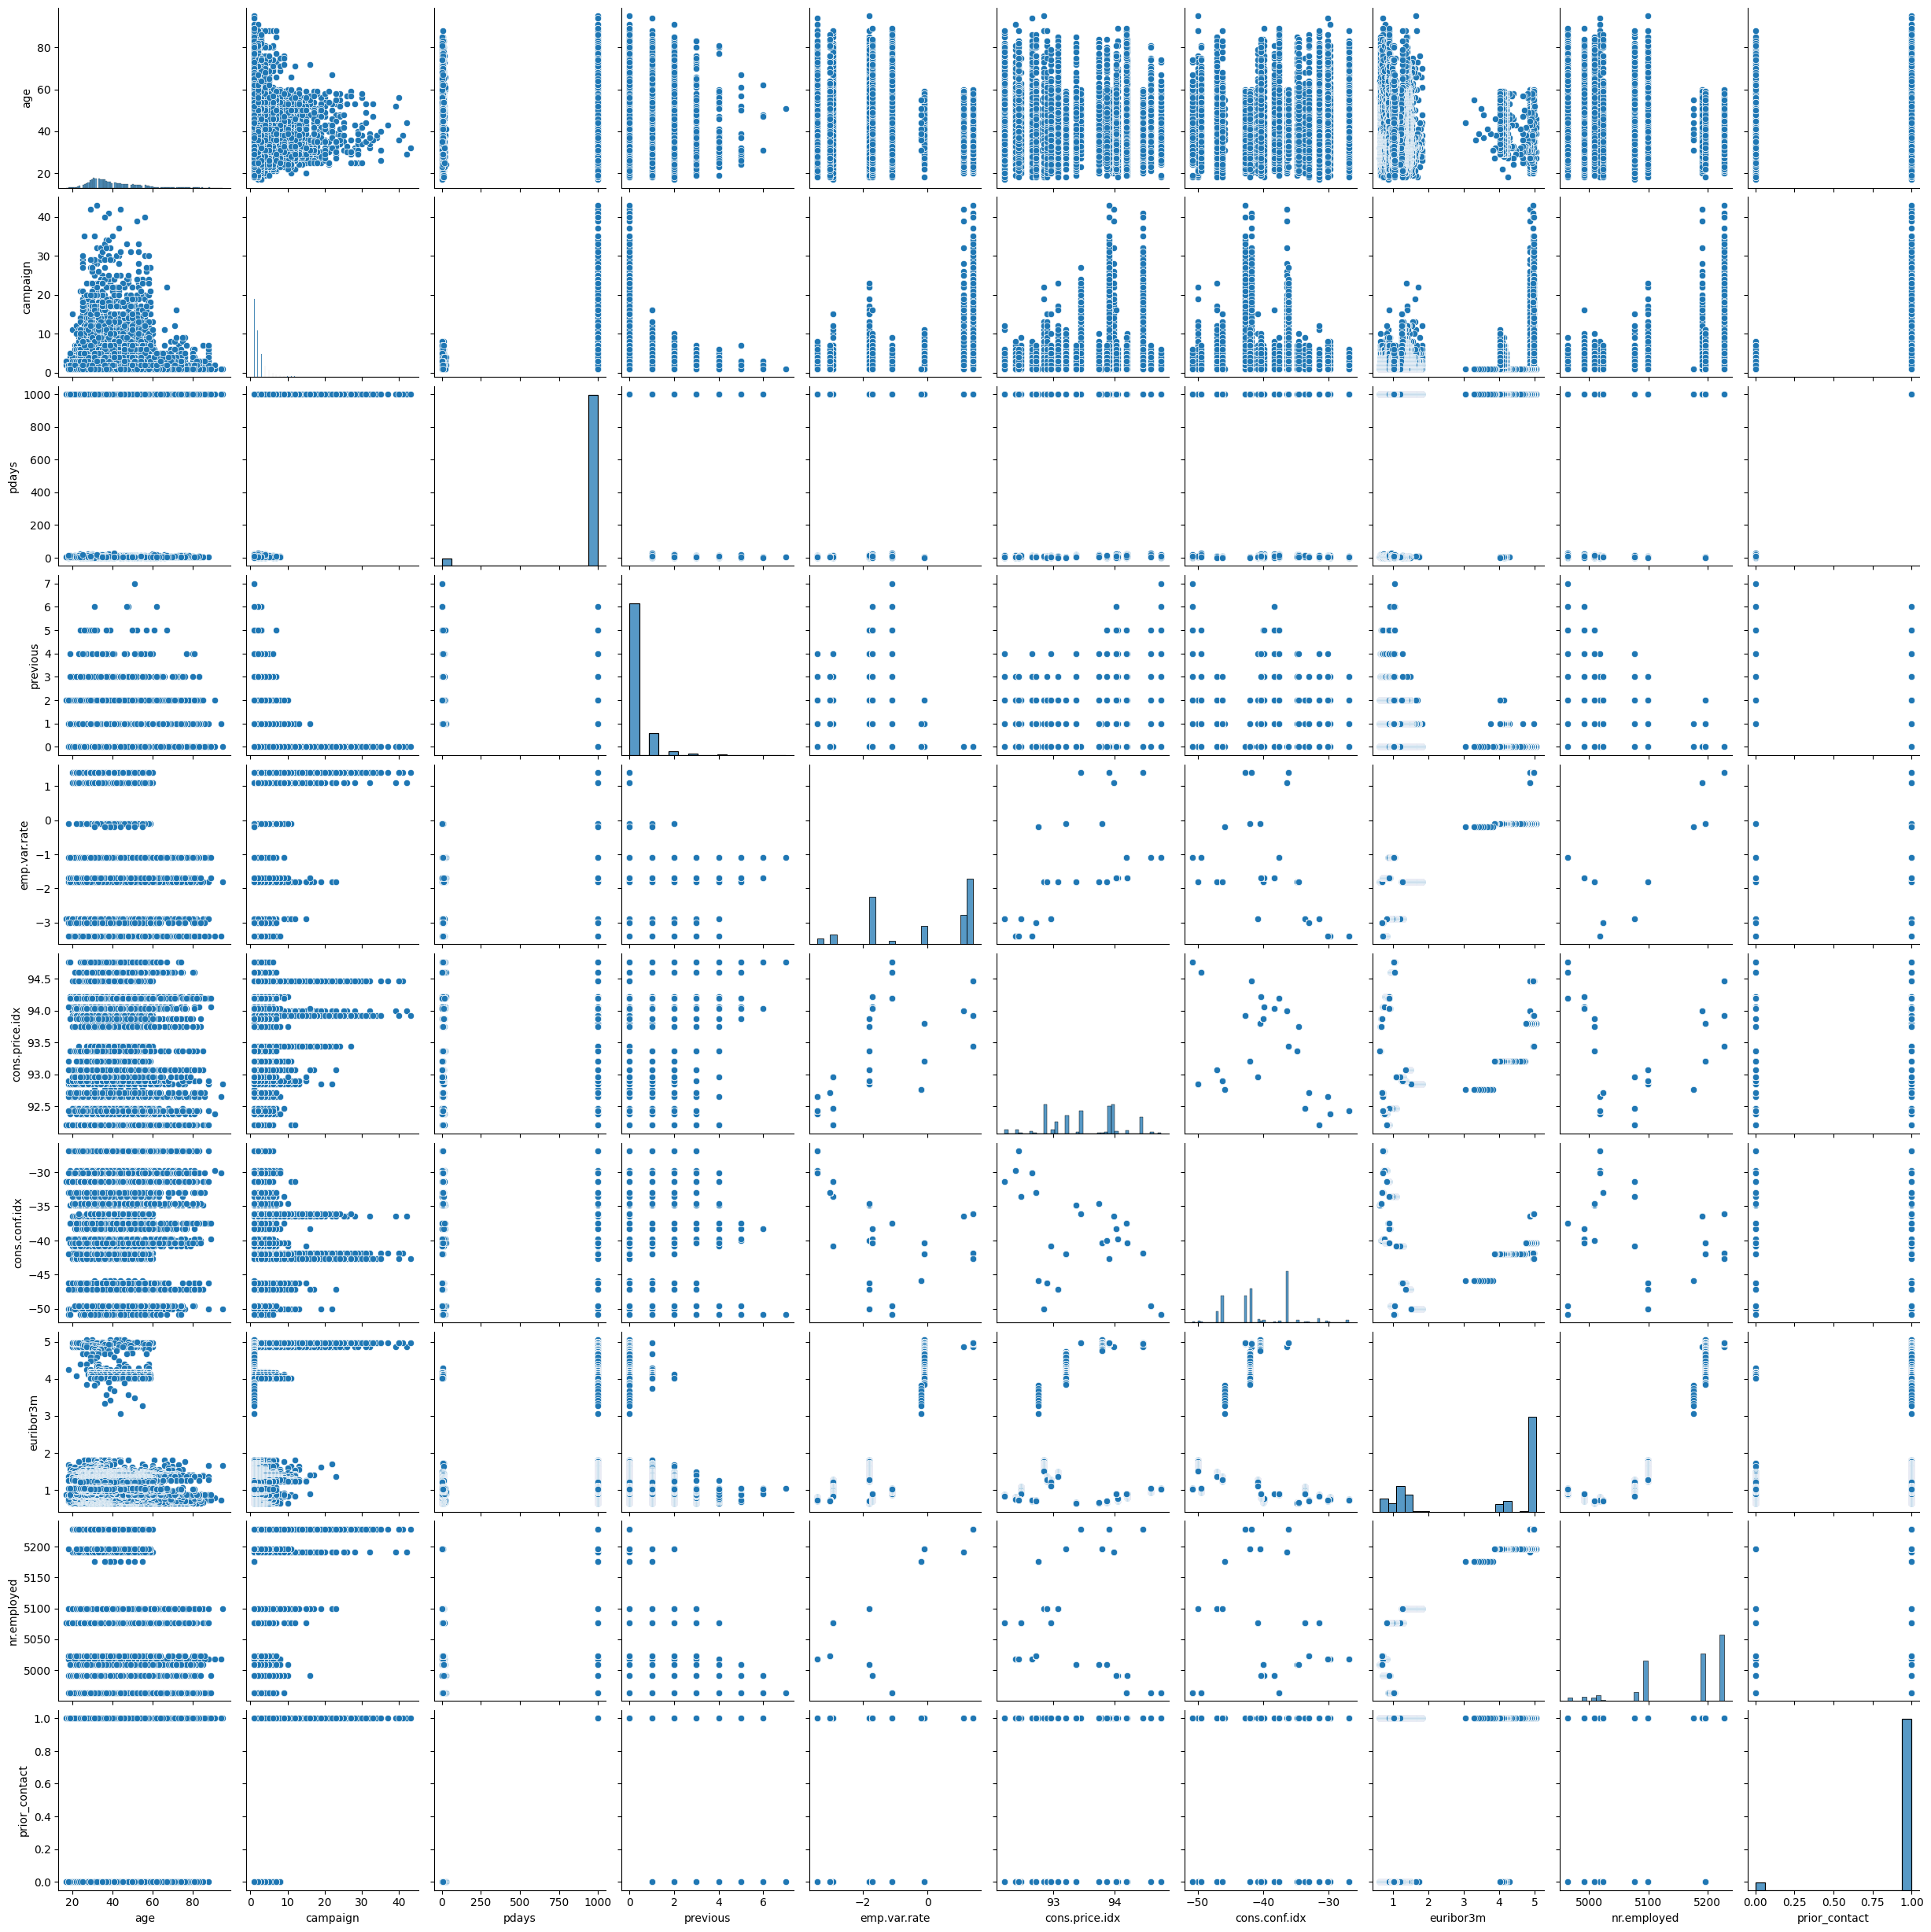

In [42]:
sns.pairplot(df)

# X and y

In [59]:
X = df.drop("y", axis = 1)
y = df["y"]

In [60]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prior_contact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [61]:
y

0         no
2         no
3         no
4         no
6         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 30477, dtype: object

In [62]:
# converting y to 1(yes) and 0(no)

y = y.map({'yes': 1, 'no': 0})

# Train test split

In [91]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prior_contact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [94]:
y.unique()

array([0, 1])

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

# Preprocessing

In [96]:
# Preprocessing required for this data set it scaling for num and dummy var with dropping binary for cat

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# numeric cols and transformer
num_cols = X.select_dtypes("number").columns
num_trans = StandardScaler()

# cathegoric cols and transformer
cat_cols = X.select_dtypes("object").columns
cat_trans = OneHotEncoder(drop = 'if_binary')

# creating preprocessor
preprocessor = make_column_transformer((num_trans, num_cols), (cat_trans, cat_cols))

# Model Selection

In [65]:
len(X_train)

3000

In [74]:
y_train

38225    0
513      0
24978    0
18126    0
38990    1
        ..
38390    0
25845    0
39748    0
11486    0
25784    0
Name: y, Length: 3000, dtype: int64

In [75]:
X_train.prior_contact.unique()

array([1, 0])

In [71]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'prior_contact'],
      dtype='object')

In [73]:
X_train['education'].unique()

array(['professional.course', 'basic.9y', 'basic.6y', 'university.degree',
       'high.school', 'basic.4y'], dtype=object)

In [70]:
X_train['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [78]:
X_train.iloc[:, 2].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [81]:
X_train.iloc[:, 3].value_counts()

education
university.degree      1002
high.school             763
basic.9y                452
professional.course     415
basic.4y                223
basic.6y                145
Name: count, dtype: int64

In [83]:
y_train.unique()

array([0, 1])

In [80]:
df.iloc[:, 3].value_counts()

education
university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
Name: count, dtype: int64

In [90]:
X_train.select_dtypes("number")['emp.var.rate'].unique()

array([-3.4,  1.1, -0.1,  1.4, -3. , -1.8, -2.9, -1.7, -1.1])

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

classifiers = [RandomForestClassifier(), SVC(), LogisticRegression(max_iter = 1000)]

for clf in classifiers:
    pipe = make_pipeline(preprocessor, clf)
    grid = GridSearchCV(pipe, cv = 5, scoring = "f1", param_grid = {}, verbose = 3)
    grid.fit(X_train, y_train)
    score = grid.best_score_
    print(f"model: {clf}, score: {score}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.408 total time=   1.3s
[CV 2/5] END ..................................., score=0.383 total time=   1.3s
[CV 3/5] END ..................................., score=0.401 total time=   1.2s
[CV 4/5] END ..................................., score=0.370 total time=   1.2s
[CV 5/5] END ..................................., score=0.370 total time=   1.3s
model: RandomForestClassifier(), score: 0.38636471874517586
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.407 total time=  14.2s
[CV 2/5] END ..................................., score=0.377 total time=  13.2s
[CV 3/5] END ..................................., score=0.356 total time=  13.8s
[CV 4/5] END ..................................., score=0.363 total time=  14.0s
[CV 5/5] END ..................................., score=0.328 total time=  13.2s
model: SVC()

In [151]:
from sklearn.neighbors import KNeighborsClassifier
pipe = make_pipeline(preprocessor, KNeighborsClassifier())
grid = GridSearchCV(pipe, cv = 5, scoring = 'f1', param_grid = {}, verbose = 3)
grid.fit(X_train, y_train)
score = grid.best_score_
print(f"model: KNeighborClassifer(), score: {score}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/gustavmalmer/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ..................................., score=0.405 total time=   2.6s


/Users/gustavmalmer/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ..................................., score=0.394 total time=   2.2s


/Users/gustavmalmer/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ..................................., score=0.393 total time=   2.2s


/Users/gustavmalmer/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ..................................., score=0.368 total time=   2.2s


/Users/gustavmalmer/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ..................................., score=0.339 total time=   2.4s
model: KNeighborClassifer(), score: 0.3797702994225646


# Hyperparameter tuning RandomForestClassifier, SVC and LogReg

In [99]:
param_grid = {'randomforestclassifier__n_estimators':[50, 100, 500, 1000],
             'randomforestclassifier__max_depth': [5, 10, 20, 70]}

pipe = make_pipeline(preprocessor, RandomForestClassifier())
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, scoring = 'recall')

grid.fit(X_train, y_train)

print(f"Best score: {grid.best_score_}, best params: {grid.best_params_}")

Best score: 0.30027959566165857, best params: {'randomforestclassifier__max_depth': 70, 'randomforestclassifier__n_estimators': 50}


In [100]:
param_grid = {'svc__C':[0.1, 1, 2, 10],
             'svc__gamma': ['scale', 'auto']
             }

pipe = make_pipeline(preprocessor, SVC(probability = True))
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, scoring = 'recall')

grid.fit(X_train, y_train)

print(f"Best score: {grid.best_score_}, best params: {grid.best_params_}")

Best score: 0.2757452299751129, best params: {'svc__C': 10, 'svc__gamma': 'scale'}


In [143]:
from sklearn.linear_model import LogisticRegression

param_grid = {'logisticregression__C': [0.1, 1, 2, 10],
              'logisticregression__solver': ['liblinear', 'lbfgs', 'sag', 'saga']
              }

pipe = make_pipeline(preprocessor, LogisticRegression(max_iter = 1000))
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='recall')

grid.fit(X_train, y_train)

print(f"Best score: {grid.best_score_}, best params: {grid.best_params_}")



Best score: 0.2459685992564599, best params: {'logisticregression__C': 10, 'logisticregression__solver': 'liblinear'}


In [101]:
# Therefore choosing random forest

# Testing the chosen model

In [103]:
pipe = make_pipeline(preprocessor, RandomForestClassifier(n_estimators = 50, max_depth = 70))
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'prior_contact'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=70, n_estimators=50))])

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, 
y_pred = pipe.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

In [108]:
print(f"accuracy: {accuracy}, precision: {precision}, recall: {recall}")

accuracy: 0.9937437108981931, precision: 0.9881166726683471, recall: 0.9614576033637001


In [ ]:
# testing on itself, therefore high values

# Refitting the model on all data

In [102]:
model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators = 50, max_depth = 70))
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'prior_contact'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=70, n_estimators=50))])

# Testing the model

In [145]:
pipe = make_pipeline(preprocessor, RandomForestClassifier(n_estimators = 50, max_depth = 70))
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'prior_contact'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=70, n_estimators=50))])

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [148]:
f1

0.39475327920049974

In [132]:
print(f"accuracy: {accuracy}, precision: {precision}, recall: {recall}")

accuracy: 0.8749343832020997, precision: 0.5414551607445008, recall: 0.3193612774451098


In [127]:
# Plotting the metrics

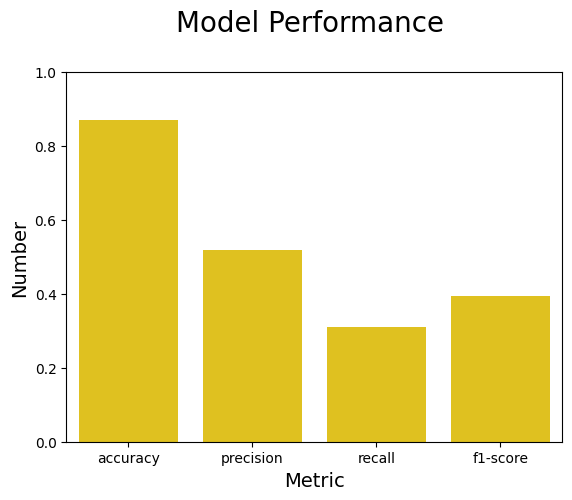

In [149]:
metrics = {'accuracy': 0.8715223097112861,
           'precision': 0.5192629815745393,
           'recall': 0.3093812375249501,
          'f1-score': 0.39475327920049974}

df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])


sns.barplot(x=df.index, y='Value', data=df, color = 'gold')
plt.title('Model Performance \n', fontsize = 20)
plt.xlabel('Metric', fontsize = 14)
plt.ylabel('Number', fontsize = 14)
plt.ylim(0, 1)  # Adjust the y-axis limits if needed
plt.savefig('model_performance.png', transparent=True)
plt.show()

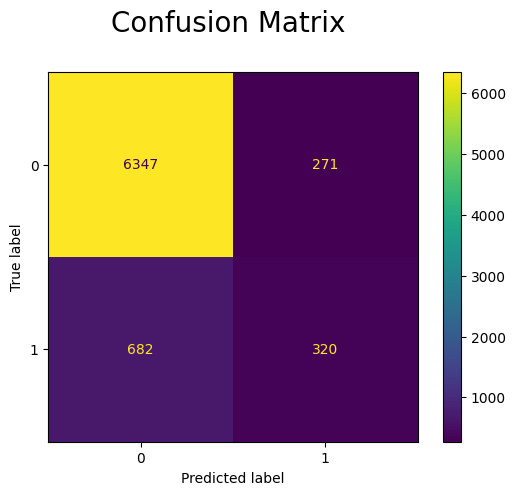

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = pipe.classes_)

disp.plot()
plt.title("Confusion Matrix \n", fontsize = 20)
plt.savefig("confusion_matrix.png", transparent = True)
plt.show()


In [136]:
y_test.value_counts()

y
0    6618
1    1002
Name: count, dtype: int64

In [139]:
6618/7620

0.868503937007874